# Preliminary Analysis — LAD

Analysis of artificial aneurysms introduced in the LAD with ASI = 2, at one location, with 5 z-scores: 6, 8, 10, 12, 14

In [1]:
import numpy as np
import vtk
from vtk.util import numpy_support as nps
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import os 

In [2]:
from AneurysmGeneration.utils.batch import * 


Gotta read in the simulation results 

In [3]:
# define path
results_path_base = 'Artificial/LAD/ASI2/'
source_path_base = 'AneurysmGeneration/models/SKD0050/left_asi_2'

In [4]:
def return_polydata(path, return_reader=False):
    '''
        Given a file name, open and return the data
    '''

    print 'return polydata'


    reader = vtk.vtkXMLPolyDataReader()
    reader.SetFileName(path)
    reader.Update()
    polydata = reader.GetOutput()

    if return_reader:
        return (polydata, reader)

    return polydata

Read in the clipped aneurysms 

In [5]:
clipped_dir = 'clipped_results_short/'
vessel = 'LAD/'
shape = ['ASI2/']
zscores=[6, 8, 10, 12, 14]
files =['lad1.vtp','lad2.vtp','lad3.vtp','lad4.vtp','lad5.vtp']

In [32]:
vtawss_dict = {}
vtawss_avgs = np.zeros((3, 5))
for i, position in enumerate([proximal, medial, distal]):
    for j, size in enumerate(zscores): 
        if j >= len(position): continue
        aneurysm = position[j]
        path_to_clipped_result = clipped_dir + vessel + shape + aneurysm + '.vtp'
        clipped_result_polydata = return_polydata(path_to_clipped_result)
        v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
        vtawss_avgs[i, j] = np.mean(v_tawss)
        vtawss_dict[(i, j)] = v_tawss
        
# for aneurysm in proximal + medial:
#     print aneurysm
#     path_to_clipped_result = clipped_dir + vessel + aneurysm + '.vtp'
#     clipped_result_polydata = return_polydata(path_to_clipped_result)
#     v_tawss = nps.vtk_to_numpy(clipped_result_polydata.GetPointData().GetArray('vTAWSS'))
#     vtawss_dict[aneurysm] = np.mean(v_tawss)
    

return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata
return polydata


In [33]:
print vtawss_dict


{(0, 1): array([0.71238583, 0.68571504, 0.71163152, ..., 1.38333454, 1.46349523,
       1.66564415]), (1, 2): array([0.94314577, 0.85805286, 0.98962762, ..., 8.04369622, 7.37096772,
       7.32981547]), (0, 0): array([ 2.36690132,  3.29658502,  2.55295159, ..., 18.25284551,
       14.31326622, 16.38282644]), (2, 2): array([23.89771732, 22.30905856, 29.10008717, ...,  5.97645175,
        5.64660637,  7.54870972]), (1, 1): array([ 4.24081476,  4.35900267,  4.55603338, ..., 34.50767839,
       30.99048592, 44.65217705]), (1, 4): array([1.53273523, 1.45220557, 1.57890068, ..., 0.66877206, 0.97765521,
       0.85527002]), (0, 2): array([0.53286399, 0.65577725, 0.64362079, ..., 1.57280603, 1.28257842,
       1.36258924]), (2, 0): array([1.16106168, 1.08680419, 1.12314483, ..., 2.46059513, 4.43919459,
       3.57189036]), (1, 3): array([0.880298  , 1.00671106, 0.88504319, ..., 3.15166565, 2.40682101,
       1.6702048 ]), (2, 3): array([0.04186924, 0.05257185, 0.01241461, ..., 1.04209452, 1.25

In [34]:
print vtawss_avgs

[[6.04847444 5.44500151 4.69613926 4.36683851 4.12913545]
 [9.56304415 8.41362484 8.24518237 6.35982849 5.22949036]
 [6.55778074 7.36489354 6.1993882  5.63373113 3.66984208]]


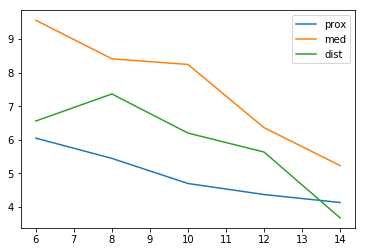

In [35]:
labels = ['prox', 'med', 'dist']
plt.figure()
for i in range(len([proximal, medial, distal])):
    plt.plot(zscores, vtawss_avgs[i], label=labels[i])
    
plt.legend()


Prepare CDFs to look at the rough distribution of the wall shear stress (FEM node-based visualization) 

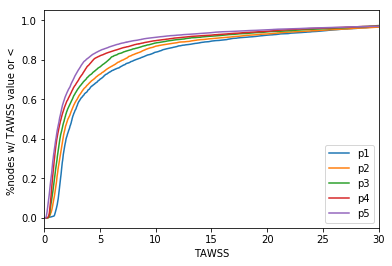

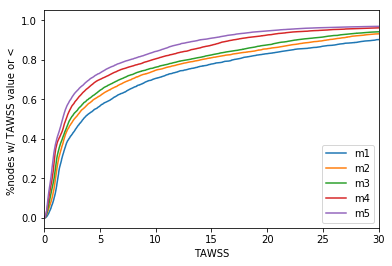

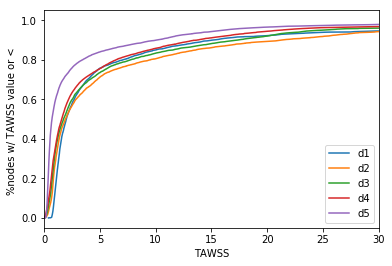

In [36]:
labels = [['p1', 'p2', 'p3', 'p4', 'p5'],
          ['m1', 'm2', 'm3', 'm4', 'm5'],
          ['d1', 'd2', 'd3', 'd4', 'd5']]

for i, labelset in enumerate(labels): 
    plt.figure()
    for j, label in enumerate(labelset): 
        ss = vtawss_dict[(i, j)]
        ss_sorted = np.sort(ss)
        plt.plot(ss_sorted, np.array(range(len(ss)))/float(len(ss)), label=label)
    plt.legend()
    plt.xlim(0, 30)
    plt.xlabel('TAWSS')
    plt.ylabel('%nodes w/ TAWSS value or < ')